# Working with APIs

### What is an API?
An API, or Application Programming Interface, is a server that you can use to retrieve and send data to using code. APIs are most commonly used to retrieve data, and that will be the focus of this beginner tutorial.

When we want to receive data from an API, we need to make a request. Requests are used all over the web. For instance, when you visited this blog post, your web browser made a request to the Dataquest web server, which responded with the content of this web pa

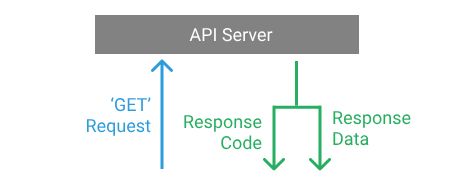ge. does.

API requests work in exactly the same way – you make a request to an API server for data, and it responds to your request.

### Making API Requests in Python
In order to work with APIs in Python, we need tools that will make those requests. In Python, the most common library for making requests and working with APIs is the requests library. The requests library isn’t part of the standard Python library, so you’ll need to install it to get started.

If you use pip to manage your Python packages, you can install requests using the following command:

In [36]:
!pip install requests 
# !python -m pip install --upgrade pip
# This is interprated as a terminal command

Once you’ve installed the library, you’ll need to import it. Let’s start with that important step:

In [22]:
import requests

### Making Our First API Request
There are many different types of requests. The most commonly used one, a GET request, is used to retrieve data. Because we’ll just be working with retrieving data, our focus will be on making ‘get’ requests.

When we make a request, the response from the API comes with a response code which tells us whether our request was successful. Response codes are important because they immediately tell us if something went wrong.

To make a ‘GET’ request, we’ll use the requests.get() function, which requires one argument — the URL we want to make the request to. We’ll start by making a request to an API endpoint that doesn’t exist, so we can see what that response code looks like.

In [39]:
response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")
print(response.status_code)

404


The get() function returns a response object. We can use the response.status_code attribute to receive the status code for our request:

The ‘404’ status code might be familiar to you — it’s the status code that a server returns if it can’t find the file we requested. In this case, we asked for this-api-doesnt-exist which (surprise, surprise) didn’t exist!

### API Status Codes
Status codes are returned with every request that is made to a web server. Status codes indicate information about what happened with a request. Here are some codes that are relevant to GET requests:

- 200: Everything went okay, and the result has been returned (if any).
- 301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
- 400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
- 401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
- 403: The resource you’re trying to access is forbidden: you don’t have the right perlessons to see it.
- 404: The resource you tried to access wasn’t found on the server.
- 503: The server is not ready to handle the request.

  
You might notice that all of the status codes that begin with a ‘4’ indicate some sort of error. The first number of status codes indicate their categorization. This is useful — you can know that if your status code starts with a ‘2’ it was successful and if it starts with a ‘4’ or ‘5’ there was an error. 

### API Documentation
In order to ensure we make a successful request, when we work with APIs it’s important to consult the documentation. Documentation can seem scary at first, but as you use documentation more and more you’ll find it gets easier.

We’ll be working with the Open Notify API, which gives access to data about the international space station. It’s a great API for learning because it has a very simple design, and doesn’t require authentication. We’ll teach you how to use an API that requires authentication in a later post.

Often there will be multiple APIs available on a particular server. Each of these APIs are commonly called endpoints. The first endpoint we’ll use is http://api.open-notify.org/astros.json, which returns data about astronauts currently in space.

If you click the link above to look at the documentation for this endpoint, you’ll see that it says This API takes no inputs. This makes it a simple API for us to get started with. We’ll start by making a GET request to the endpoint using the requests library:

In [43]:
%%time
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200
CPU times: total: 0 ns
Wall time: 641 ms


We received a ‘200’ code which tells us our request was successful. The documentation tells us that the API response we’ll get is in JSON format. In the next section we’ll learn about JSON, but first let’s use the response.json() method to see the data we received back from the API:

In [26]:
print(response.json())

{'number': 10, 'people': [{'name': 'Sergey Prokopyev', 'craft': 'ISS'}, {'name': 'Dmitry Petelin', 'craft': 'ISS'}, {'name': 'Frank Rubio', 'craft': 'ISS'}, {'name': 'Stephen Bowen', 'craft': 'ISS'}, {'name': 'Warren Hoburg', 'craft': 'ISS'}, {'name': 'Sultan Alneyadi', 'craft': 'ISS'}, {'name': 'Andrey Fedyaev', 'craft': 'ISS'}, {'name': 'Jing Haiping', 'craft': 'Tiangong'}, {'name': 'Gui Haichow', 'craft': 'Tiangong'}, {'name': 'Zhu Yangzhu', 'craft': 'Tiangong'}], 'message': 'success'}


## Working with JSON Data in Python

JSON (JavaScript Object Notation) is the language of APIs. JSON is a way to encode data structures that ensures that they are easily readable by machines. JSON is the primary format in which data is passed back and forth to APIs, and most API servers will send their responses in JSON format.

You might have noticed that the JSON output we received from the API looked like it contained Python dictionaries, lists, strings and integers. You can think of JSON as being a combination of these objects represented as strings. Let’s look at a simple example:

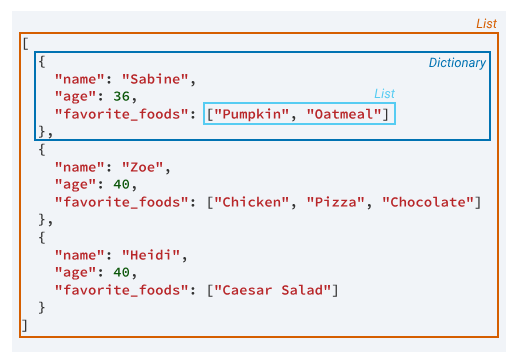

Python has great JSON support with the json package. The json package is part of the standard library, so we don’t have to install anything to use it. We can both convert lists and dictionaries to JSON, and convert strings to lists and dictionaries. In the case of our ISS Pass data, it is a dictionary encoded to a string in JSON format.

The json library has two main functions:

- json.dumps() — Takes in a Python object, and converts (dumps) it to a string.
- json.loads() — Takes a JSON string, and converts (loads) it to a Python object.

The dumps() function is particularly useful as we can use it to print a formatted string which makes it easier to understand the JSON output, like in the diagram we saw above:

In [41]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "message": "success",
    "number": 10,
    "people": [
        {
            "craft": "ISS",
            "name": "Sergey Prokopyev"
        },
        {
            "craft": "ISS",
            "name": "Dmitry Petelin"
        },
        {
            "craft": "ISS",
            "name": "Frank Rubio"
        },
        {
            "craft": "ISS",
            "name": "Stephen Bowen"
        },
        {
            "craft": "ISS",
            "name": "Warren Hoburg"
        },
        {
            "craft": "ISS",
            "name": "Sultan Alneyadi"
        },
        {
            "craft": "ISS",
            "name": "Andrey Fedyaev"
        },
        {
            "craft": "Tiangong",
            "name": "Jing Haiping"
        },
        {
            "craft": "Tiangong",
            "name": "Gui Haichow"
        },
        {
            "craft": "Tiangong",
            "name": "Zhu Yangzhu"
        }
    ]
}


- Immediately we can understand the structure of the data more easily – we can see that their are six people currently in space, with their names existing as dictionaries inside a list.

### Using an API with Query Parameters

The http://api.open-notify.org/astros.json endpoint we used earlier does not take any parameters. We just send a GET request and the API sends back data about the number of people currently in space.

It’s very common, however, to have an API endpoint that requires us to specify parameters. An example of this the https://api.open-notify.org/iss-pass.json endpoint. This endpoint tells us the next times that the international space station will pass over a given location on the earth.

If we look at the documentation, it specifies required lat (latitude) and long (longitude) parameters.

We can do this by adding an optional keyword argument, params, to our request. We can make a dictionary with these parameters, and then pass them into the requests.get function. Here’s what our dictionary would look like, using coordinates for New York City:

In [28]:
parameters = {
    "lat": 40.71,
    "lon": -74
}

We can also do the same thing directly by adding the parameters directly to the URL. like this:
https://api.open-notify.org/iss-pass.json?lat=40.71&lon;=-74

It’s almost always preferable to setup the parameters as a dictionary, because requests takes care of some things that come up, like properly formatting the query parameters, and we don’t need to worry about inserting the values into the URL string.

Let’s make a request using these coordinates and see what response we get.

In [42]:
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

print(response.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [31]:
pass_times = response.json()['response']
jprint(pass_times)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)